In [1]:
from __future__ import division
from sympy import *
from sympy.printing.c import C99CodePrinter
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math
import sys
import glob

import ga_toolkit_v2 as ga

from matplotlib import colors
colorlist=list(colors.TABLEAU_COLORS)

from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

In [2]:
#Starobinsky prior
V0_S = 1.7020770065396188e-13
phi0_S = 1.0677899904007735
kappa = math.sqrt(8.*math.pi)

def V_staro(x,V0,phi0):
    gamma_S = math.sqrt(2./3.)*kappa
    return V0*pow(1.-sym.exp(gamma_S*(x-phi0)),2.)

In [3]:
#The grammar
grammar = ['trig1','trig2']

# The prior
def GA_prior(x, GAx):
	return V_staro(x,V0_S,phi0_S)*(1.+GAx)

def V_prior(x):
  Vp  = V_staro(x,V0_S,phi0_S)
  return Vp

In [4]:
files = []
for file in glob.glob("*.pic"):
    files.append(file)
print(files)
print(len(files))

['chain_unbinned_staro_trig_high_f_seed_55742_1666671009.6661482.pic', 'chain_unbinned_staro_trig_high_f_seed_46057_1666663938.5191965.pic', 'chain_unbinned_staro_trig_high_f_seed_89719_1666671009.4564993.pic', 'chain_unbinned_staro_trig_high_f_seed_41951_1666669935.1527953.pic', 'chain_unbinned_staro_trig_high_f_seed_45598_1666671009.332764.pic', 'chain_unbinned_staro_trig_high_f_seed_12959_1666663938.5190473.pic', 'chain_unbinned_staro_trig_high_f_seed_25028_1666671009.7561584.pic', 'chain_unbinned_staro_trig_high_f_seed_20993_1666582216.983416.pic', 'chain_unbinned_staro_trig_high_f_seed_61583_1666645062.4000082.pic', 'chain_unbinned_staro_trig_high_f_seed_73457_1666671009.6880817.pic', 'chain_unbinned_staro_trig_high_f_seed_61612_1666671009.8212197.pic', 'chain_unbinned_staro_trig_high_f_seed_80186_1666671009.4719632.pic']
12


In [5]:
chains=[ [] for _ in range(len(files)) ]
bfps = [ [] for _ in range(len(files)) ]
for file_num in range(len(files)):
  with open(files[file_num], "rb") as openfile:
    while True:
      try:
        chains[file_num].append(pickle.load(openfile))
      except EOFError:
        break

In [6]:
for file_num in range(len(files)):
  # This is the number of generations and the population (Ngen, 2, Npop)
  print(np.asarray(chains[file_num],dtype=object).shape)
  for i in range(0,len(chains[file_num])):
    bfps[file_num].append(-sorted(chains[file_num][i][1], key=lambda x: x[0])[-1][0])

(661, 2, 100)
(692, 2, 100)
(695, 2, 100)
(700, 2, 100)
(686, 2, 100)
(700, 2, 100)
(684, 2, 100)
(700, 2, 100)
(692, 2, 100)
(700, 2, 100)
(665, 2, 100)
(664, 2, 100)


In [7]:
# Join all chains and sort wrt chi^2
chi2_last_gen=[ [] for _ in range(len(files)) ]
for file_num in range(len(files)):
  chi2_last_gen[file_num].append(abs(np.asarray(sorted(chains[file_num][len(chains[file_num])-1][1], key=lambda x: x[0]))[::,0]))

chi2_last_gen_data=sorted(np.asarray(chi2_last_gen).flatten());

#This is the cut-off
cutoff=math.ceil(math.erf(1/np.sqrt(2.))*len(chi2_last_gen_data))

chi2_cut = chi2_last_gen_data[cutoff]
print(chi2_cut)

24545.355558539602


In [8]:
# The positions of the best 68.3%
best68 = [ [] for _ in range(len(files)) ]
for file_num in range(len(files)):
  b68_0=np.abs(chains[file_num][len(chains[file_num])-1][1]);
  b68_1=b68_0[np.where(b68_0[:,0] <=chi2_cut)][:,1]
  best68[file_num].append([int(i) for i in b68_1])
  print(best68[file_num])

[[27, 38, 24, 68, 51, 18, 29, 76, 35, 70, 42, 47, 44, 9, 32, 59, 31, 0, 46, 61, 36, 41, 1, 16, 73, 14, 67, 69, 91, 96, 28, 66, 64, 4, 15, 20, 43, 55, 72, 77, 81, 84, 89, 92, 93, 95, 88, 22, 23, 71, 78, 83, 85, 86, 90, 94, 99, 87, 39, 40, 60, 79, 80, 82, 97, 62, 63, 98, 37, 75]]
[[29, 32, 43, 18, 39, 48, 53, 44, 16, 63, 12, 11, 30, 20, 46, 52, 45, 24, 61, 19, 21, 22, 23, 25, 31, 51, 55, 56, 57, 58, 59, 60, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[66, 11, 21, 55, 9, 23, 30, 10, 49, 4, 24, 33, 37, 63, 76, 81, 83, 3, 29, 72, 96, 2, 18, 19, 31, 50, 53, 54, 65, 34, 35, 36, 59, 60, 62, 64, 67, 69, 70, 71, 74, 75, 77, 78, 79, 80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99]]
[[53, 8, 45, 47, 1, 33, 14, 18, 52, 20, 55, 21, 17, 25, 36, 37, 38, 43, 46, 50, 56, 57, 60, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,

In [9]:
#The chi^2 of the prior
chi2_mins = [24554.631827858942]

# The values for the plot
chi2p = [chi2_mins[0] for x in range(1, 701,1)]

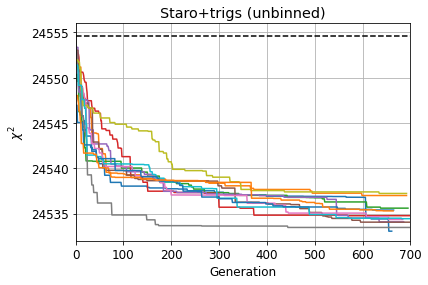

In [10]:
fig1=plt.figure(1)
plt.rcParams.update({'font.size': 12})
for i in range(len(bfps)):
  plt.plot(range(1,len(bfps[i])+1,1), bfps[i])
plt.plot(range(1,701,1), chi2p,'k--')
#plt.xscale("log")
#plt.yscale("log")
#plt.legend(loc='upper right')
plt.title(r'Staro+trigs (unbinned)')
plt.xlabel('Generation')
plt.ylabel(r'$\chi^2$')
ax = plt.gca()
ax.set_xlim([0,700])
ax.set_ylim([24532,24556])
plt.grid()
plt.show()
fig1.savefig('chi2_N_unbinned_staro_trig_high_f_k_dacade_100.pdf', bbox_inches='tight')

In [11]:
for jj in range(len(chains)):
  best_than=[i[1] for i in chains[jj][-1][1] if abs(i[0]) <= chi2_mins[0]]
  print('For j=',jj,' there are:',len(best_than),'/ '+str(len(chains[jj][0][1]))+' functions which are better than the prior.')
  print('This is ',100*len(best_than)/len(chains[jj][-1][1]),'% of the total.')

For j= 0  there are: 84 / 100 functions which are better than the prior.
This is  84.0 % of the total.
For j= 1  there are: 90 / 100 functions which are better than the prior.
This is  90.0 % of the total.
For j= 2  there are: 88 / 100 functions which are better than the prior.
This is  88.0 % of the total.
For j= 3  there are: 70 / 100 functions which are better than the prior.
This is  70.0 % of the total.
For j= 4  there are: 89 / 100 functions which are better than the prior.
This is  89.0 % of the total.
For j= 5  there are: 87 / 100 functions which are better than the prior.
This is  87.0 % of the total.
For j= 6  there are: 72 / 100 functions which are better than the prior.
This is  72.0 % of the total.
For j= 7  there are: 86 / 100 functions which are better than the prior.
This is  86.0 % of the total.
For j= 8  there are: 96 / 100 functions which are better than the prior.
This is  96.0 % of the total.
For j= 9  there are: 92 / 100 functions which are better than the prior.


In [12]:
# The position of the best-fit in the chain
bf_pos = [ [] for _ in range(len(files)) ]
bf_chi2 = [ [] for _ in range(len(files)) ]

for jj in range(len(files)):
  bf_pos[jj] = chains[jj][-1][1][-1][1]
  bf_chi2[jj]=-chains[jj][-1][1][-1][0]
  print('For j=',jj,' the best-fit is',bf_pos[jj])
  print('The best-fit chi^2 is',bf_chi2[jj])

j_min = min(range(len(bf_chi2)), key=bf_chi2.__getitem__)
print(j_min)

For j= 0  the best-fit is 75
The best-fit chi^2 is 24533.061777750085
For j= 1  the best-fit is 99
The best-fit chi^2 is 24536.99830644345
For j= 2  the best-fit is 99
The best-fit chi^2 is 24535.603349587025
For j= 3  the best-fit is 99
The best-fit chi^2 is 24534.77089212164
For j= 4  the best-fit is 88
The best-fit chi^2 is 24534.082647567848
For j= 5  the best-fit is 91
The best-fit chi^2 is 24534.05442001112
For j= 6  the best-fit is 79
The best-fit chi^2 is 24534.35068382499
For j= 7  the best-fit is 99
The best-fit chi^2 is 24533.47354607956
For j= 8  the best-fit is 87
The best-fit chi^2 is 24537.226329498364
For j= 9  the best-fit is 77
The best-fit chi^2 is 24534.441709944174
For j= 10  the best-fit is 74
The best-fit chi^2 is 24535.390644581425
For j= 11  the best-fit is 82
The best-fit chi^2 is 24535.30101063641
0


In [13]:
#print('Best-fit VGA(phi) =',expr)
phi=symbols("phi")
for jj in range(len(files)):
  print('V_GA = ',ga.make_function(phi,chains[jj][-1][0][bf_pos[jj]],grammar,GA_prior)/V_prior(phi))

V_GA =  1.23471110155187e-7*sin(8178.31885777725*phi) + 3.96051334116646e-7*cos(1228.8552025561*phi)**4 + 2.27223864531328e-7*cos(1498.06935840614*phi)**7 + 2.59832093801365e-7*cos(2158.30600419416*phi)**4 + 1.0
V_GA =  2.96608710746306e-7*sin(1095.60417100547*phi)**8 + 1.53835951271127e-7*cos(1477.84548573071*phi)**5 + 1.65979835409831e-7*cos(2333.23693669716*phi)**3 + 1.31400213814507e-7*cos(2476.21747676567*phi) + 1.0
V_GA =  1.03296050912443e-7*sin(8164.00263655074*phi) + 1.9906898379878e-7*cos(1503.49395205293*phi)**7 + 1.45238169087947e-7*cos(2527.07067603984*phi) + 1.55650378521657e-7*cos(4336.30614345483*phi) + 1.0
V_GA =  2.26572072733829e-7*sin(1398.23640057491*phi)**8 + 1.04398646265767e-7*sin(2293.30237216688*phi) + 3.8745060715244e-7*sin(2359.15742100501*phi)**2 + 2.06978924539825e-7*sin(4006.61982101696*phi)**2 + 1.0
V_GA =  1.85129899985303e-7*sin(1270.45136406177*phi)**5 + 1.68126329875506e-7*sin(2259.88928472988*phi) + 2.51104735270268e-7*sin(2334.39452585422*phi)**6 +

In [14]:
# This is the best-fit!
print(ga.make_function(phi,chains[j_min][-1][0][bf_pos[j_min]],grammar,GA_prior)/V_prior(phi))
print(round(bf_chi2[j_min],3))

1.23471110155187e-7*sin(8178.31885777725*phi) + 3.96051334116646e-7*cos(1228.8552025561*phi)**4 + 2.27223864531328e-7*cos(1498.06935840614*phi)**7 + 2.59832093801365e-7*cos(2158.30600419416*phi)**4 + 1.0
24533.062


In [15]:
# Some parameters and scales
ks=5.e-2
kmin=1.e-4
kmax=10**(-0.3)
kappa=math.sqrt(8*math.pi)

# The observable region:  
Vtot=V_prior(phi)
Vptot=sym.diff(Vtot,phi)
V0=Vtot.subs(phi,0)
Vp0=Vptot.subs(phi,0)
phi_min=(2*np.log(kmin/ks)*V0*Vp0)/(-2*kappa**2*V0**2+Vp0**2)
phi_max=(2*np.log(kmax/ks)*V0*Vp0)/(-2*kappa**2*V0**2+Vp0**2)
print([phi_min,phi_max])
print([kappa*phi_min,kappa*phi_max])

[-0.0259231186045795, 0.00961471200593172]
[-0.129959244121704, 0.0482010179330052]


In [16]:
phis = [x * 0.0001 for x in range(round(10000.*phi_min),round(10000.*phi_max))]
#Rescale
phis_pl=[kappa*x for x in phis ]

#The prior rescaled 
priorV_pl = [kappa**4*V_prior(x) for x in phis]

#This contains the values for the potential in the observable region.
potGA_pl = [ [] for _ in range(len(files)) ]
potGA_norm = [ [] for _ in range(len(files)) ]

for jj in range(len(files)):
	potGA_pl[jj] = [0] * len(chains[jj][-1][0])
	potGA_norm[jj] = [0] * len(chains[jj][-1][0])
	for i in range(0,len(chains[jj][-1][0])):
		potGA_norm[jj][i] = [ga.make_function(x,chains[jj][-1][0][i],grammar,GA_prior)/V_prior(x) for x in phis]
		potGA_pl[jj][i] = [kappa**4*ga.make_function(x,chains[jj][-1][0][i],grammar,GA_prior) for x in phis]

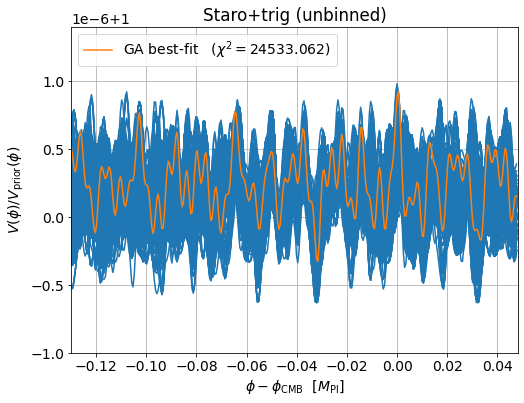

In [17]:
fig2 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for jj in range(len(files)):
	#for i in range(0,len(chains[jj][-1][0])):
	for i in best68[jj][0]:
		plt.plot(phis_pl, potGA_norm[jj][i], color=colorlist[0])
	#plt.plot(phis, potGA[jj][bf_pos[jj]], 'b', label=r'GA best-fit   $(\chi^2=$'+str(round(bf_chi2[jj],3))+')')
plt.plot(phis_pl, potGA_norm[j_min][bf_pos[j_min]], color=colorlist[1], label=r'GA best-fit   $(\chi^2=$'+str(round(bf_chi2[j_min],3))+')')
plt.legend(loc='upper left')#, bbox_to_anchor=(0.0075, 0.925))
#plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99))
plt.title(r'Staro+trig (unbinned)')
plt.xlabel(r'$\phi-\phi_\mathrm{CMB}$  $[M_\mathrm{Pl}]$')
plt.ylabel(r'$V(\phi)/V_\mathrm{prior}(\phi)$')
ax = plt.gca()
ax.set_ylim([1-1.e-6,1+1.4e-6])
ax.set_xlim([-0.0259*kappa,0.0096*kappa])
plt.grid()
plt.show()
fig2.savefig('potentials_unbinned_staro_trig_high_f_k_decade_100_GA.pdf', bbox_inches='tight')

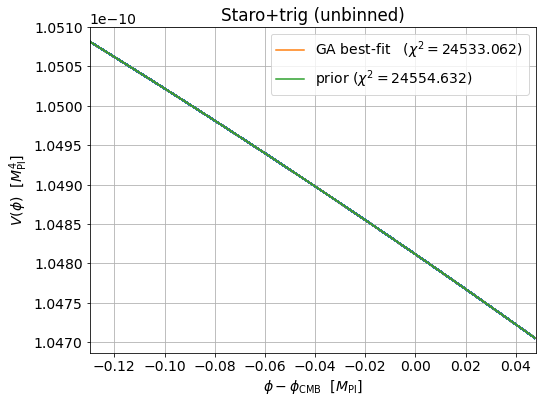

In [18]:
fig3 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for jj in range(len(files)):
	for i in best68[jj][0]:
		plt.plot(phis_pl, potGA_pl[jj][i], color=colorlist[0])
	#plt.plot(phis, potGA[jj][bf_pos[jj]], 'b', label=r'GA best-fit   $(\chi^2=$'+str(round(bf_chi2[jj],3))+')')
plt.plot(phis_pl, potGA_pl[j_min][bf_pos[j_min]], color=colorlist[1], label=r'GA best-fit   $(\chi^2=$'+str(round(bf_chi2[j_min],3))+')')
#for i in best_than:
#	plt.plot(phis, potGA[i], 'k')
#plt.plot(phis, potGA[best_than[0]], 'k',label=r'GA better than the prior' )
#plt.plot(phis, potGA[0], 'r', label=r'GA functions')
plt.plot(phis_pl, priorV_pl, color=colorlist[2], label=r'prior $(\chi^2=$'+str(round(chi2_mins[0],3))+')')
plt.legend(loc='upper right')#, bbox_to_anchor=(0.40, 0.90))
plt.title(r'Staro+trig (unbinned)')
plt.xlabel(r'$\phi-\phi_\mathrm{CMB}$  $[M_\mathrm{Pl}]$')
plt.ylabel(r'$V(\phi)$  $[M_\mathrm{Pl}^4]$')
ax = plt.gca()
#ax.set_ylim([1-1.e-6,1+1.2e-6])
ax.set_xlim([-0.0259*kappa,0.0096*kappa])
plt.grid()
plt.show()
fig3.savefig('potentials_unbinned_staro_trig_high_f_k_decade_100_GA_full.pdf', bbox_inches='tight')

In [ ]:
# Range:
varphi_min = 0
varphi_max = 1

# Number of sample points
N_tot=3000

# The values of the scalar field
varphis = np.linspace(varphi_min, varphi_max, N_tot)

# The sampling rate
df = N_tot/(varphi_max-varphi_min)

In [ ]:
# Calculate the distro of the frequencies // for now best 10 in each chain
omega_peaks = []
for jj in range(len(files)):
	for i in best68[jj][0]:
		Vs = []
		for vphi in varphis:
			Vs.append(ga.make_function(vphi/kappa,chains[jj][-1][0][bf_pos[jj]],grammar,GA_prior)/V_prior(vphi/kappa)-1.)
		# The FFT
		yf = fft(Vs)
		xf = fftfreq(N_tot, 1/df)[:N_tot//2]
		omega =2*np.pi*xf
		data_fft = 2.0/N_tot * np.abs(yf[0:N_tot//2])
		peaks, _ = find_peaks(data_fft,height = 0.002*max(data_fft))
		omega_peaks.append(omega[peaks])

# Flatten the array
omega_peaks_flat = np.asarray([item for sublist in omega_peaks for item in sublist])
# Save the array for postprocessing
np.save("omega_peaks_array.npy", omega_peaks_flat)

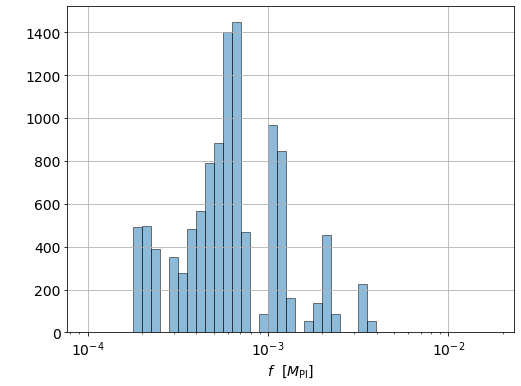

In [ ]:
fig4 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
# the histogram of the data
#n, bins, patches = plt.hist(1/omega_peaks_flat, bins='auto', density=True, facecolor=colorlist[0], alpha=0.5, histtype='bar', ec='black')
n, bins, patches = plt.hist(1/omega_peaks_flat, bins=10**np.arange(-4,-1.7,0.05), density=True, facecolor=colorlist[0], alpha=0.5, histtype='bar', ec='black')

plt.xlabel(r'$f~~[M_\mathrm{Pl}]$')
plt.ylabel(r'$~$')
plt.xscale("log")
#plt.yscale("log")
ax = plt.gca()
#ax.set_xlim([0.8e-4,1.1e-2])
#ax.set_ylim([.7e-1,1.1e5])
#ax.set_yticklabels([])
plt.grid(True)
plt.show()
fig4.savefig('spectrography.pdf', bbox_inches='tight')